<a href="https://colab.research.google.com/github/zafe312/public_zafe/blob/master/Board_game_review_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas
import seaborn
import matplotlib
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.0.5
3.2.2
0.22.2.post1
0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# dataset
games = pd.read_csv('games.csv')

In [17]:
# print names of columns in games
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(49613, 20)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


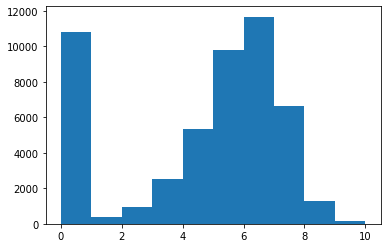

In [21]:
# histogram of ratings from average_rating colummn
plt.hist(games['average_rating'])
plt.show()

In [38]:
# print first row of all games with zero score
print(games[games['average_rating']==0].iloc[0])

# print first row of games with score more than 0
print(games[games['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [39]:
# remove any row without user review
games = games[games['users_rated'] > 0]

#remove any row with missing data
games = games.dropna(axis = 0)

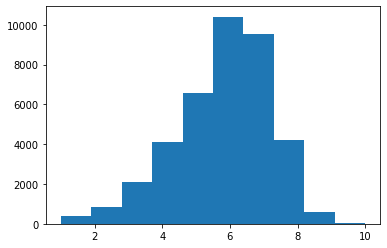

In [42]:
# new histogram of average_rating
plt.hist(games['average_rating'])
plt.show()

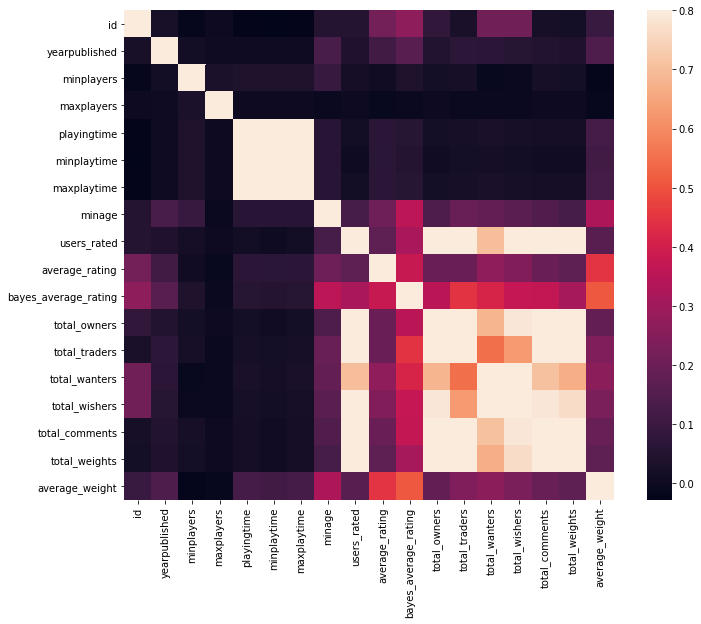

In [45]:
# correlation matrix
cormap = games.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(cormap, vmax = 0.8, square=True)
plt.show()

In [54]:
# get all the column from the dataframe
column = games.columns.tolist()
column = [c for c in column if c not in ['bayes_average_rating','id','name','average_rating','type']]

# store the variable we'll be predicting on
target = 'average_rating'

In [55]:
# generate train and test data
train = games.sample(frac=0.8, random_state=1)

#select everything that's not on the train set and put in test set
test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(31018, 20)
(7754, 20)


In [56]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
#initialize the model class
LR = LinearRegression()

# Fit the model to training data
LR.fit(train[column], train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Generate prediction for test dataset
predictions = LR.predict(test[column])

# Compute error between test prediction and actul value
mean_squared_error(predictions, test[target])


1.5537540363216735

In [61]:
# import random forrest reggressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state=1)

In [63]:
# fit the model to train
RFR.fit(train[column], train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [64]:
# generate prediction
predictions = RFR.predict(test[column])

# Error
mean_squared_error(predictions, test[target])

1.2286217115522178

In [73]:
# Thus non linear regressor gives better predictions than linear regressor

In [74]:
# give prediction for single input
example = test[column].iloc[0]
print(example)
print(example.shape)
example = example.values.reshape(1, -1)
print(example.shape)
print(LR.predict(example))
print(RFR.predict(example))
print(test[target].iloc[0]) # actual value

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64
(15,)
(1, 15)
[7.7405124]
[8.10042046]
8.07933
